In [97]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy
import random

# My Tools
from toolkit.tools import print_column_uniques, make_df, get_column_uniques


%matplotlib inline

In [98]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [99]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [100]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [101]:
# COLORS
# ============================
# Light
color_hombres_light = "#8ecae6"
color_mujeres_light = "#ffafcc"
color_neutro_light = "#d4a373"
# Dark
color_hombres_dark = "#023047"
color_mujeres_dark = "#ff006e"
color_neutro_dark = "#ffb703"

In [102]:
df.shape

(342, 25)

# Education

    - About the "education level" of the people who answered the survey.

## General Education
    - column name : 'educacion'

In [103]:
# First lets print the column content.
df["educacion"].value_counts()

Ed. Universitaria                                                           151
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  42
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      36
Ed. Universitaria;Autodidacta                                                29
Master                                                                       17
Ed. Secundaria                                                               12
Ed. Basica;Ed. Secundaria                                                    11
Ed. Basica;Ed. Secundaria;Autodidacta                                        10
Ed. Universitaria;Master                                                      8
Ed. Secundaria;Autodidacta                                                    8
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Universitaria;Master;Autodidacta                                          3
Autodidacta                             

In [104]:
# Printing "unique" values in the column.
ed_uniques = get_column_uniques(df, "educacion")

In [105]:
ed_uniques

['Ed. Basica',
 'Ed. Universitaria',
 'Doctorado',
 'Master',
 'Autodidacta',
 'Ed. Secundaria']

              Levels  TotalCount
0         Ed. Basica         107
1  Ed. Universitaria         279
2          Doctorado           2
3             Master          38
4        Autodidacta          94
5     Ed. Secundaria         130


<Figure size 900x500 with 0 Axes>

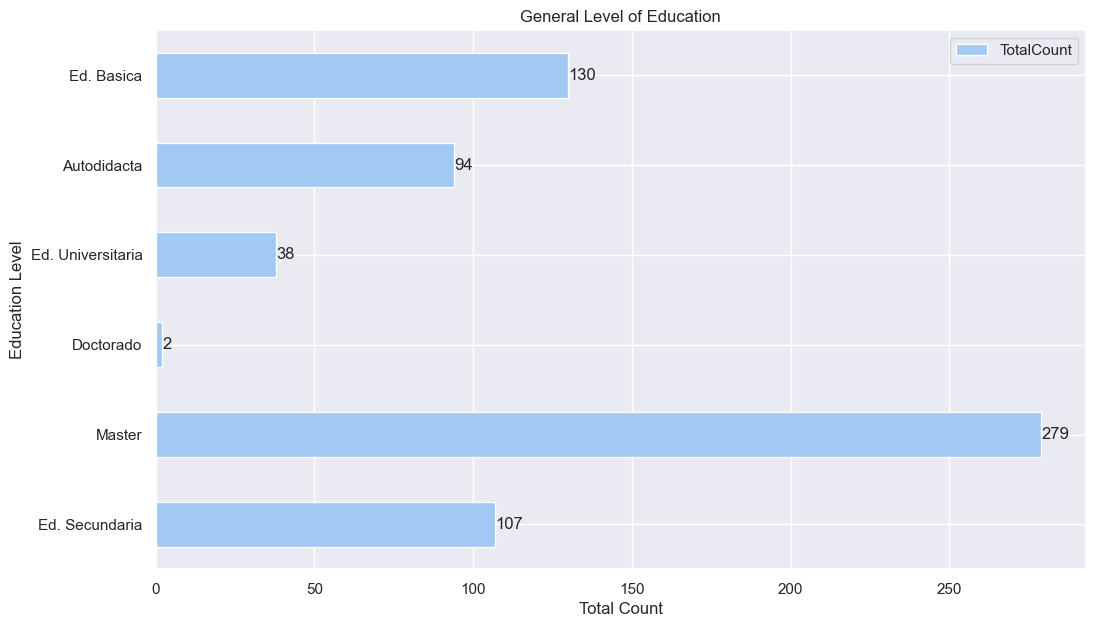

In [106]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
nv_ed = make_df(df, "educacion", "Levels", "Total Count")

nv_ed_plot = nv_ed.plot(
    kind="barh",
    title="General Level of Education",
    xlabel="Total Count",
    ylabel="Education Level",
    legend=True,
)


nv_ed_plot.set_yticks([0, 1, 2, 3, 4, 5], minor=False)
nv_ed_plot.set_yticklabels(
    [
        "Ed. Secundaria",
        "Master",
        "Doctorado",
        "Ed. Universitaria",
        "Autodidacta",
        "Ed. Basica",
    ],
    fontdict=None,
    minor=False,
)

cat_values = [i for i in nv_ed.TotalCount.value_counts().keys()]


print(nv_ed)

# Plot annotations.
for k, v in enumerate(cat_values):
    nv_ed_plot.annotate(v, (v, k), va="center")

    # nv_ed_plot.annotate(v, (v,k),va='center')

plt.show()

In [107]:
df["educacion"].str.split(";").value_counts()

[Ed. Universitaria]                                                                151
[Ed. Basica, Ed. Secundaria, Ed. Universitaria]                                     42
[Ed. Basica, Ed. Secundaria, Ed. Universitaria, Autodidacta]                        36
[Ed. Universitaria, Autodidacta]                                                    29
[Master]                                                                            17
[Ed. Secundaria]                                                                    12
[Ed. Basica, Ed. Secundaria]                                                        11
[Ed. Basica, Ed. Secundaria, Autodidacta]                                           10
[Ed. Universitaria, Master]                                                          8
[Ed. Secundaria, Autodidacta]                                                        8
[Ed. Basica, Ed. Secundaria, Ed. Universitaria, Master]                              4
[Ed. Universitaria, Master, Autodidacta]   

## Carers or Specialties
    - column name : 'carr_especialidades'

In [108]:
# Printing the column content.
df["carr_especialidades"].value_counts()

Ing. Informática                                                        107
Análisis de Sist.                                                        69
Programación;Análisis de Sist.                                           33
Programación;Ing. Informática                                            21
Programación                                                             17
Programación;Análisis de Sist.;Ing. Informática                          17
Ninguna                                                                  15
Análisis de Sist.;Ing. Informática                                       11
Ing. Electrónica                                                          6
Otras                                                                     5
Programación;Análisis de Sist.;Otras                                      5
Ing. Informática;Otras                                                    4
Otras Ing.                                                                4
Análisis de 

In [109]:
carr_esp_uniques = get_column_uniques(df, "carr_especialidades")

In [110]:
carr_esp_uniques
print(len(carr_esp_uniques))

10


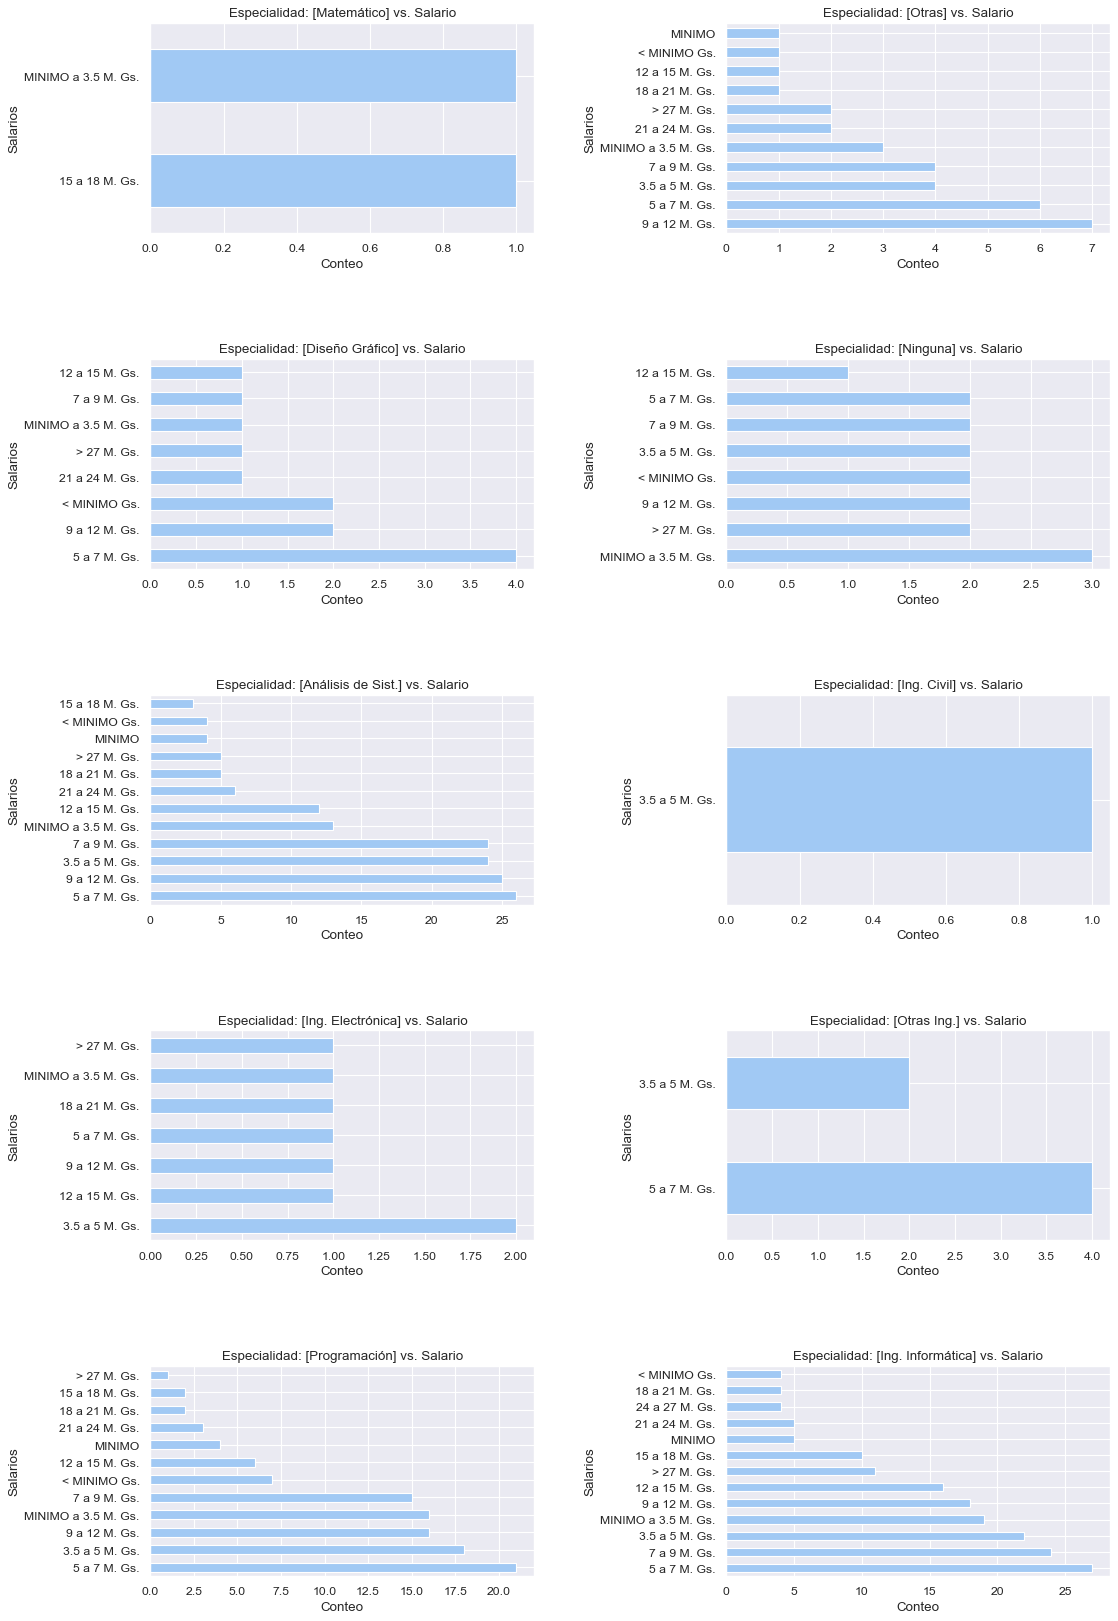

In [111]:
plt.figure(figsize=(30, 40), dpi=80)

for k, v in enumerate(carr_esp_uniques):
    plt.subplot(8, 2, k + 1)
    aux_df = df[df["carr_especialidades"].str.contains(v)][
        "salario_mensual"
    ].value_counts(normalize=False)
    mod = aux_df.plot(
        kind="barh",
        title="Especialidad: [{0}] vs. Salario".format(v),
        legend=False,
        ylabel="Salarios",
        xlabel="Conteo",
    )


plt.subplots_adjust(left=0.6, bottom=0.1, right=1, top=0.9, wspace=0.5, hspace=0.6)

            carreras  count
0         Matemático      2
1              Otras     32
2     Diseño Gráfico     13
3            Ninguna     16
4  Análisis de Sist.    151
5         Ing. Civil      1
6   Ing. Electrónica      8
7         Otras Ing.      6
8       Programación    111
9   Ing. Informática    169
['Matemático', 'Otras', 'Diseño Gráfico', 'Ninguna', 'Análisis de Sist.', 'Ing. Civil', 'Ing. Electrónica', 'Otras Ing.', 'Programación', 'Ing. Informática']


<Figure size 900x500 with 0 Axes>

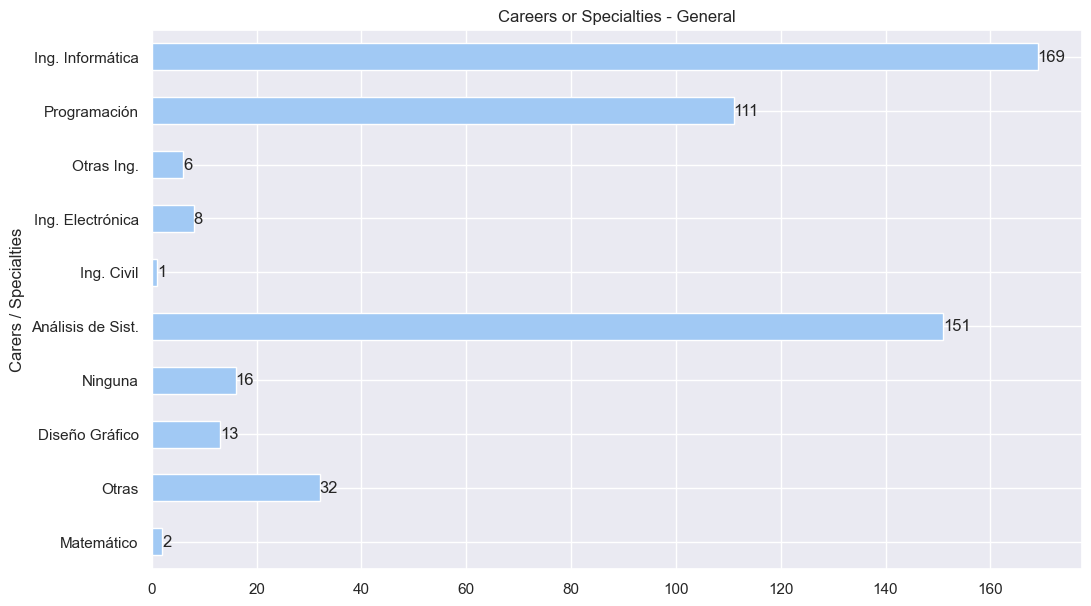

In [112]:
# Creating a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot.
carr_df = make_df(df, "carr_especialidades", "carreras", "count")

chart_labels = [i for i in carr_df["carreras"]]

print(carr_df)
print("=" * 34)
print(chart_labels)

carr_plot = carr_df.plot(
    kind="barh",
    title="Careers or Specialties - General",
    ylabel="Carers / Specialties",
    legend=False,
)

carr_plot.set_yticklabels([v for k, v in enumerate(chart_labels)])

# Plot annotations.
for k, v in enumerate([i for i in carr_df["count"]]):
    carr_plot.annotate(v, (v, k), va="center")
plt.show()

## Importance of Formal Education
    - column name : 'imp_ed_formal'

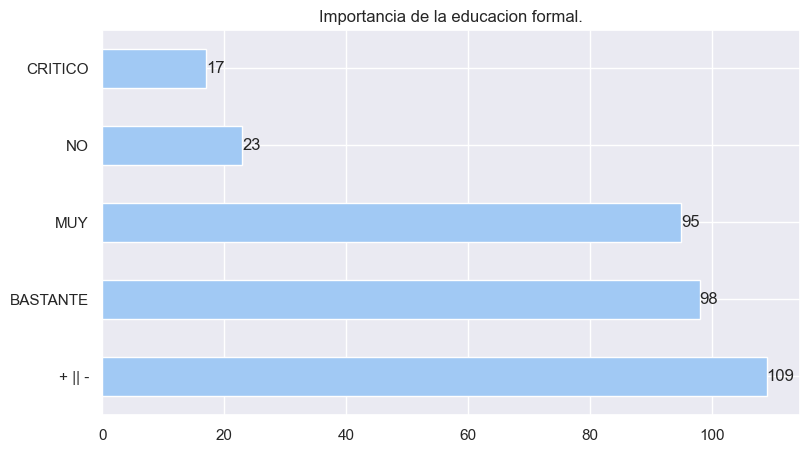

In [113]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = (
    df["imp_ed_formal"]
    .value_counts()
    .plot(kind="barh", title="Importancia de la educacion formal.")
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_df.annotate(v, (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [114]:
# Making groups by gender.
gen = df.groupby("genero")

In [115]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [116]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [117]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("HOMBRE")["educacion"].value_counts()

Ed. Universitaria                                                           117
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  37
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      31
Ed. Universitaria;Autodidacta                                                23
Master                                                                       15
Ed. Secundaria                                                               10
Ed. Basica;Ed. Secundaria                                                     9
Ed. Basica;Ed. Secundaria;Autodidacta                                         8
Ed. Secundaria;Autodidacta                                                    7
Ed. Universitaria;Master                                                      6
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master;Autodidacta                2
Autodidacta                             

In [118]:
ed_uniques

['Ed. Basica',
 'Ed. Universitaria',
 'Doctorado',
 'Master',
 'Autodidacta',
 'Ed. Secundaria']

          categories  count
0         Ed. Basica     93
1  Ed. Universitaria    226
2          Doctorado      2
3             Master     32
4        Autodidacta     78
5     Ed. Secundaria    113


<Figure size 900x500 with 0 Axes>

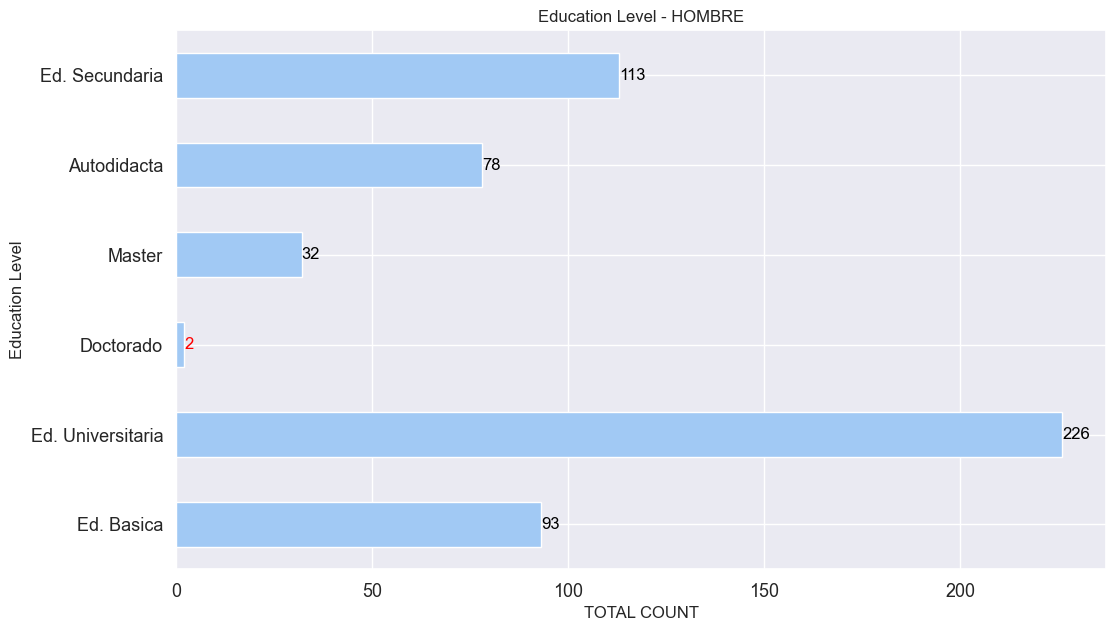

In [119]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("HOMBRE"), "educacion", "categories", "count")
ed_hombres_plot = ed_hombres_df.plot(
    kind="barh",
    title="Education Level - HOMBRE",
    ylabel="Education Level",
    xlabel="TOTAL COUNT",
    fontsize=13,
    legend=False,
)

print(ed_hombres_df)
ed_hombres_plot.set_yticklabels([v for k, v in enumerate(ed_uniques)])

# Plot annotations.
for k, v in enumerate(ed_hombres_df["count"]):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_plot.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [120]:
# Print 'value counts' of this column.
gen.get_group("HOMBRE")["carr_especialidades"].value_counts()

Ing. Informática                                                        92
Análisis de Sist.                                                       52
Programación;Análisis de Sist.                                          22
Programación;Ing. Informática                                           17
Programación;Análisis de Sist.;Ing. Informática                         15
Programación                                                            15
Ninguna                                                                 13
Análisis de Sist.;Ing. Informática                                       7
Ing. Electrónica                                                         5
Programación;Análisis de Sist.;Otras                                     5
Ing. Informática;Otras                                                   4
Otras Ing.                                                               4
Análisis de Sist.;Otras                                                  3
Otras                    

            Category  count
0         Matemático      2
1              Otras     29
2     Diseño Gráfico     11
3            Ninguna     14
4  Análisis de Sist.    115
5   Ing. Electrónica      7
6         Otras Ing.      5
7       Programación     90
8   Ing. Informática    143


<Figure size 900x500 with 0 Axes>

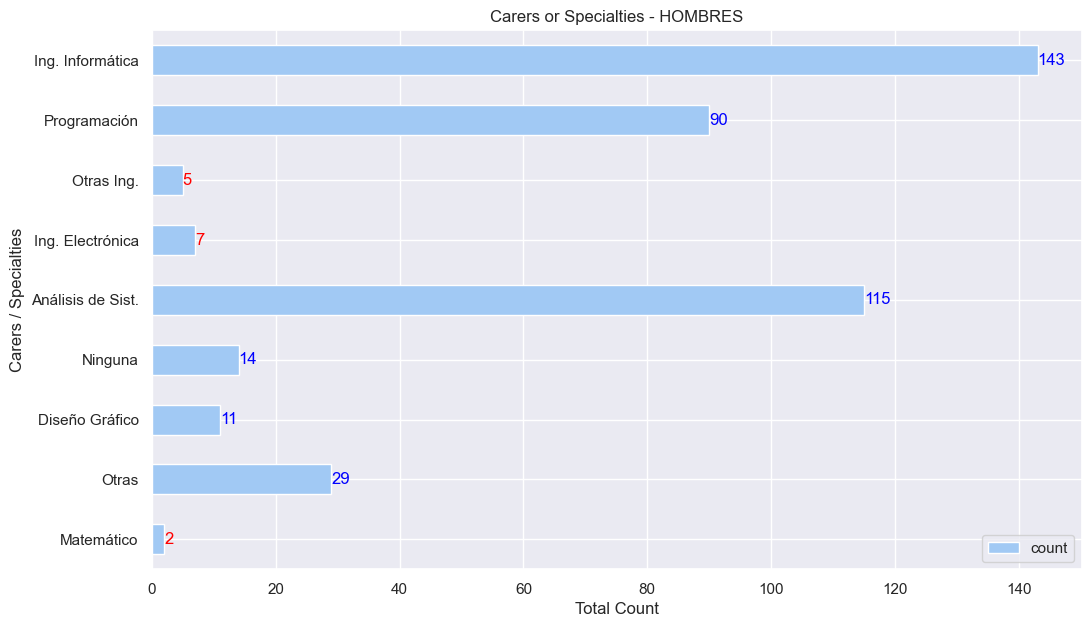

In [121]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(
    gen.get_group("HOMBRE"), "carr_especialidades", "Category", "count"
)
carr_hombres_plot = carr_hombres_df.plot(
    kind="barh",
    title="Carers or Specialties - HOMBRES",
    ylabel="Carers / Specialties",
    xlabel="Total Count",
)

print(carr_hombres_df)
carr_hombres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_hombres_df["Category"])]
)


# Plot annotations.
for k, v in enumerate(carr_hombres_df["count"]):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_plot.annotate(v, (v, k), va="center", color="blue")
plt.show()

 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [122]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

+ || -      109
BASTANTE     98
MUY          95
NO           23
CRITICO      17
Name: imp_ed_formal, dtype: int64

In [123]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

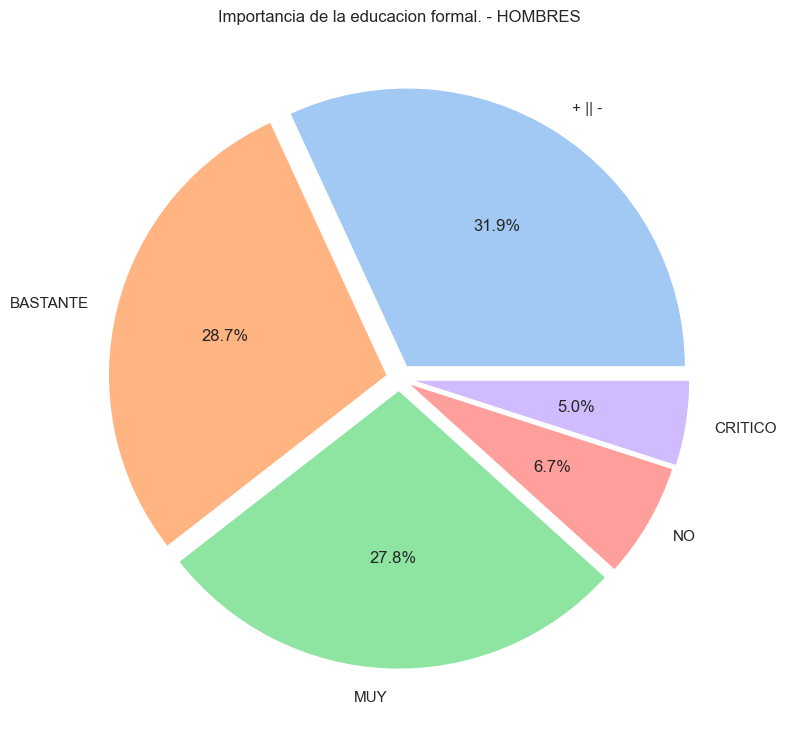

In [133]:
# Making a chart for this column.
fig = plt.figure(figsize=(9, 30))
ax1 = plt.subplot(111)
# Plot
import_df = (
    df["imp_ed_formal"]
    .value_counts(normalize=True)
    .plot(
        kind="pie",
        title="Importancia de la educacion formal. - HOMBRES",
        autopct="%1.1f%%",
        ylabel="",
        xlabel="",
        explode=[
            random.uniform(0.03, 0.05) for i in get_column_uniques(df, "imp_ed_formal")
        ],
    )
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    if v < 10:
        import_df.annotate(v, (v, k), va="center", color="red")
    else:
        import_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### EDUCACION - MUJERES

In [134]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [135]:
gen.get_group("MUJER")["educacion"].value_counts()

Ed. Universitaria                                          29
Ed. Universitaria;Autodidacta                               5
Ed. Basica;Ed. Secundaria;Ed. Universitaria                 5
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta     3
Ed. Universitaria;Master                                    2
Master                                                      2
Master;Autodidacta                                          1
Ed. Basica;Ed. Secundaria                                   1
Ed. Secundaria                                              1
Name: educacion, dtype: int64

          categories  count
0         Ed. Basica      9
1  Ed. Universitaria     44
2             Master      5
3        Autodidacta      9
4     Ed. Secundaria     10


<Figure size 900x500 with 0 Axes>

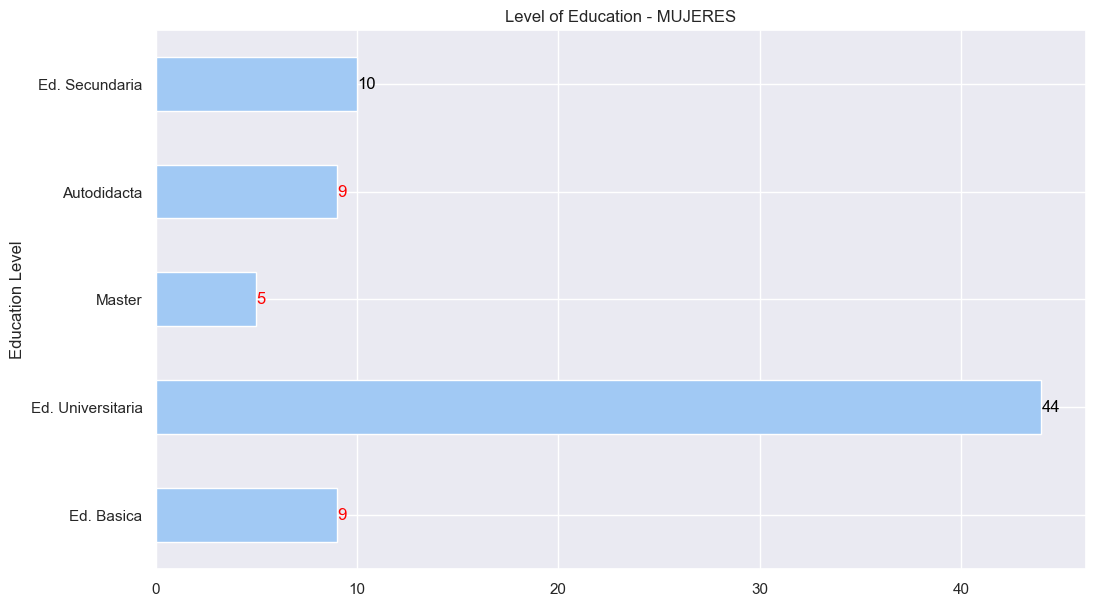

In [139]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("MUJER"), "educacion", "categories", "count")
ed_mujeres_plot = ed_mujeres_df.plot(
    kind="barh",
    title="Level of Education - MUJERES",
    ylabel="Education Level",
    legend=False,
)

print(ed_mujeres_df)
ed_mujeres_plot.set_yticklabels([v for k, v in enumerate(ed_mujeres_df["categories"])])


for k, v in enumerate([i for i in ed_mujeres_df["count"]]):
    if v < 10:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        ed_mujeres_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

          categories  count
0              Otras      2
1     Diseño Gráfico      1
2  Análisis de Sist.     27
3       Programación     15
4   Ing. Informática     22


<Figure size 900x500 with 0 Axes>

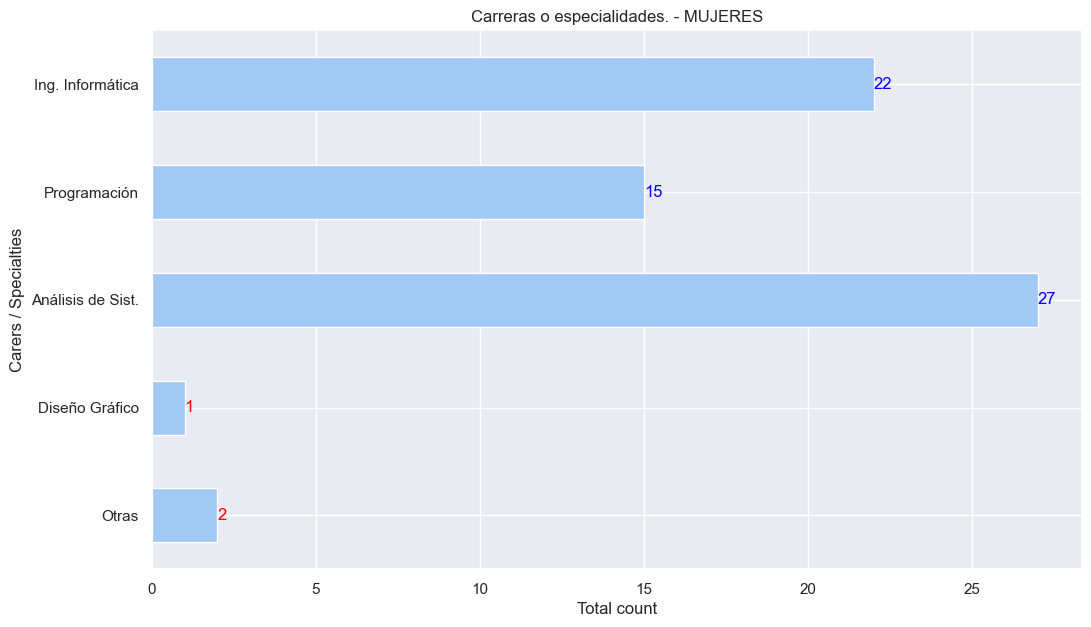

In [145]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(
    gen.get_group("MUJER"), "carr_especialidades", "categories", "count"
)
carr_mujeres_plot = carr_mujeres_df.plot(
    kind="barh",
    ylabel="Carers / Specialties",
    xlabel="Total count",
    title="Carreras o especialidades. - MUJERES",
    legend=False,
)

print(carr_mujeres_df)
carr_mujeres_plot.set_yticklabels(
    [v for k, v in enumerate(carr_mujeres_df["categories"])]
)

for k, v in enumerate([i for i in carr_mujeres_df["count"]]):
    if v < 10:
        carr_mujeres_plot.annotate(v, (v, k), va="center", color="red")
    else:
        carr_mujeres_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

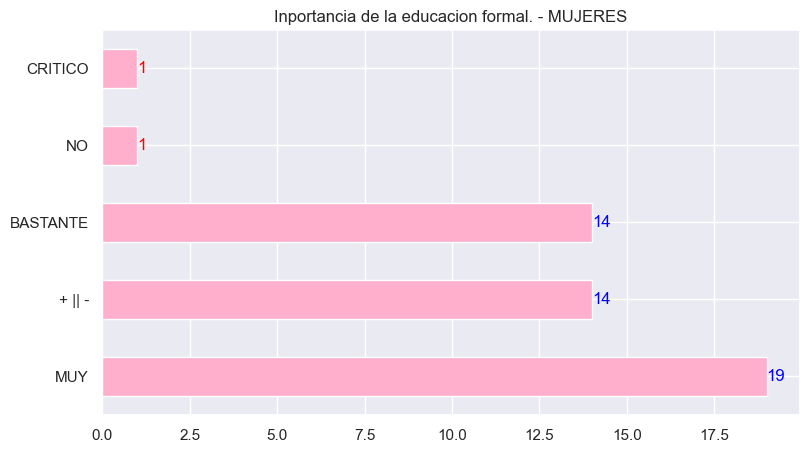

In [148]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = (
    gen.get_group("MUJER")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Inportancia de la educacion formal. - MUJERES",
        color=color_mujeres_light,
    )
)

for k, v in enumerate(gen.get_group("MUJER")["imp_ed_formal"].value_counts().values):
    if v < 10:
        muj_import_df.annotate(v, (v, k), va="center", color="red")
    else:
        muj_import_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EDUCACION - NO COMPARTO

In [149]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

          categories  count
0        Autodidacta      2
1         Ed. Basica      2
2  Ed. Universitaria      4
3     Ed. Secundaria      3


<Figure size 900x500 with 0 Axes>

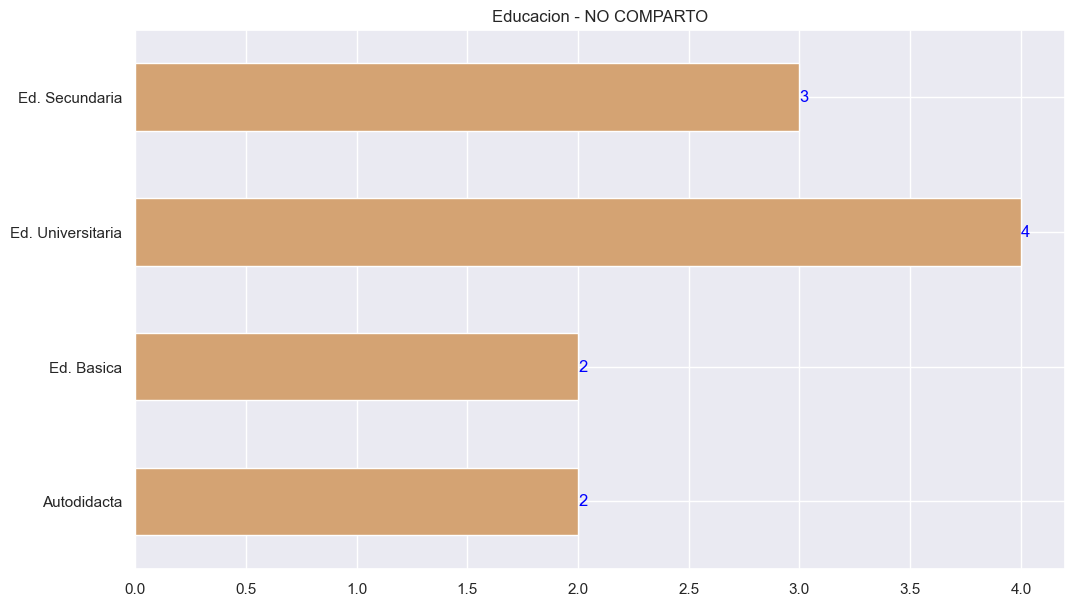

In [157]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "educacion", "categories", "count"
)

ed_no_comp_plot = ed_no_comp_df.plot(
    kind="barh", title="Educacion - NO COMPARTO", color=color_neutro_light, legend=False
)


print(ed_no_comp_df)
ed_no_comp_plot.set_yticklabels([v for k, v in enumerate(ed_no_comp_df["categories"])])


for k, v in enumerate([i for i in ed_no_comp_df["count"]]):
    ed_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

           categoria  cuenta
0     Diseño Gráfico       1
1            Ninguna       1
2  Análisis de Sist.       3
3         Ing. Civil       1
4   Ing. Electrónica       1
5         Otras Ing.       1
6       Programación       2
7   Ing. Informática       1


<Figure size 900x500 with 0 Axes>

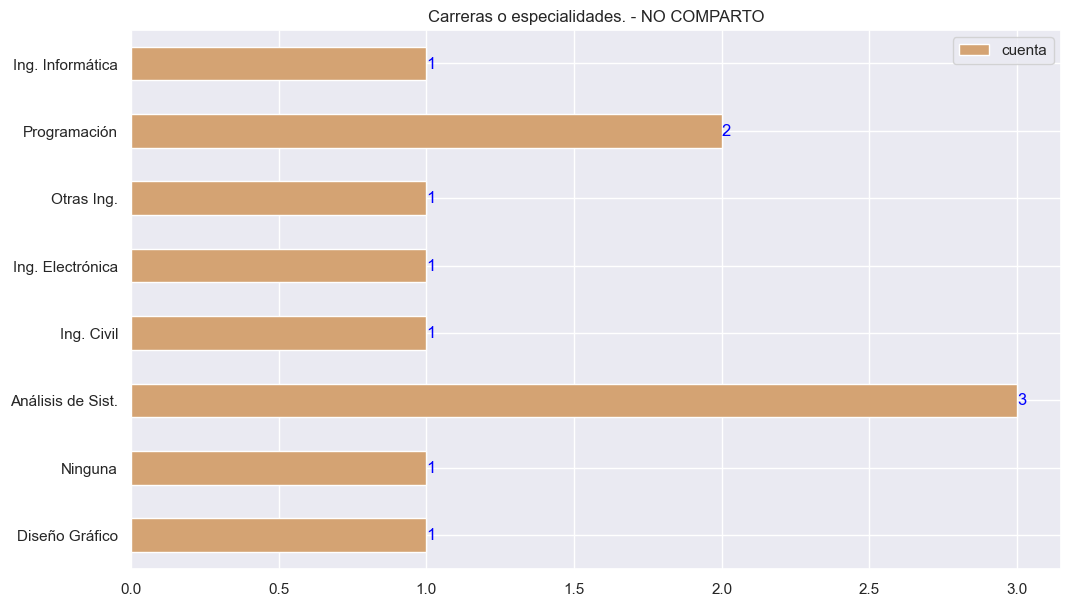

In [164]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(
    gen.get_group("NO COMPARTO"), "carr_especialidades", "categoria", "cuenta"
)
carr_no_comp_plot = carr_no_comp_df.plot(
    kind="barh",
    title="Carreras o especialidades. - NO COMPARTO",
    color=color_neutro_light,
)


print(carr_no_comp_df)
carr_no_comp_plot.set_yticklabels(
    [v for k, v in enumerate(carr_no_comp_df["categoria"])]
)


for k, v in enumerate([i for i in carr_no_comp_df["cuenta"]]):
    carr_no_comp_plot.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

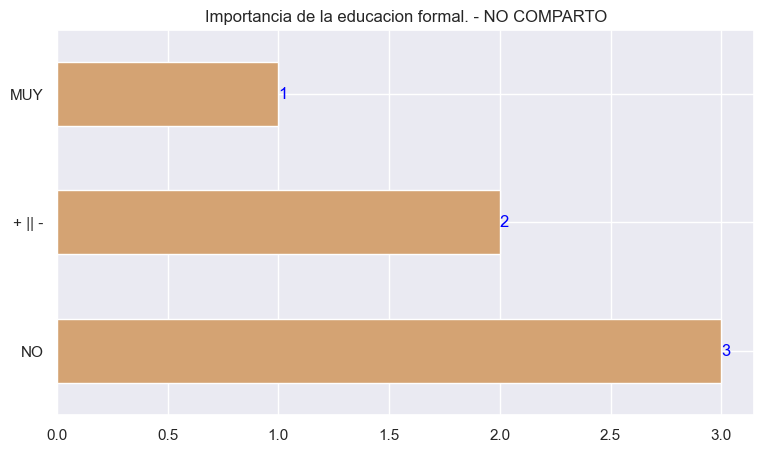

In [165]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp = (
    gen.get_group("NO COMPARTO")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - NO COMPARTO",
        color=color_neutro_light,
    )
)

for k, v in enumerate(
    [i for i in gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [ ]:
df.columns